In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
os.chdir("C:/Users/priya/Desktop/Fake-Job-Posting-Prediction-master")

In [2]:
fake_job_postings = pd.read_csv('data/fake_job_postings_cleaned.csv')

In [3]:
X = fake_job_postings[['telecommuting', 'ratio', 'text', 'character_count']]
y = fake_job_postings['fraudulent']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=53)

In [5]:
X_train_num = X_train[['telecommuting', 'ratio', 'character_count']]
X_test_num = X_test[['telecommuting', 'ratio', 'character_count']]

In [6]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.text.values)
count_test = count_vectorizer.transform(X_test.text.values)

In [7]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=1)
tfidf_train = tfidf_vectorizer.fit_transform(X_train.text)
tfidf_test = tfidf_vectorizer.transform(X_test.text)

In [8]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

C:\Users\priya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\priya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split

nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)


0.971395881006865

In [10]:
metrics.f1_score(y_test, pred)

0.7435897435897436

In [11]:
from sklearn.linear_model import SGDClassifier

clf_log = SGDClassifier(loss='log').fit(count_train, y_train)
pred_log = clf_log.predict(count_test)
metrics.accuracy_score(y_test, pred_log)

0.9725400457665904

In [12]:
clf_num = SGDClassifier(loss='log').fit(X_train_num, y_train)
pred_num = clf_num.predict(X_test_num)
metrics.accuracy_score(y_test, pred_num)

0.9339244851258581

In [13]:
prediction_array = []

for i, j in zip(pred_num, pred_log):
    if i == 0 and j == 0:
        prediction_array.append(0)
    else:
        prediction_array.append(1)

In [14]:
metrics.accuracy_score(y_test, prediction_array)

0.9725400457665904

In [15]:
metrics.f1_score(y_test, prediction_array)

0.7847533632286996

In [16]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, prediction_array)

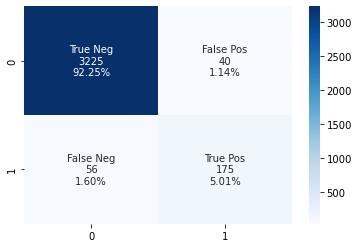

In [17]:
group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

In [18]:
len(y_test[y_test == 0]), len(y_test[y_test == 1])

(3265, 231)

In [19]:
new=pd.Series(["Marketing Intern US, NY, New York We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff Experience with content management systems a major plus (any blogging counts!)Familiar with the Food52 editorial voice and aestheticLoves food, appreciates the importance of home cooking and cooking with the seasonsMeticulous editor, perfectionist, obsessive attention to detail, maddened by typos and broken links, delighted by finding and fixing themCheerful under pressureExcellent communication skillsA+ multi-tasker and juggler of responsibilities big and smallInterested in and engaged with social media like Twitter, Facebook, and PinterestLoves problem-solving and collaborating to drive Food52 forwardThinks big picture but pitches in on the nitty gritty of running a small company (dishes, shopping, administrative support)Comfortable with the realities of working for a startup: being on call on evenings and weekends, and working long hours   Internship     Marketing"])
count_train = count_vectorizer.fit_transform(X_train.text.values)
count_test = count_vectorizer.transform(new.values)
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
print(pred)


[0]


In [20]:
new = pd.Series(["Military Benefits Counselor US, , chicago Anthony Warren is a Marketing and Advertising consultant. Â After completing one enlistment as a U.S. Marine at Quantico, VA, where he provided administrative support to the Lawyer for the Commandant of the Marine Corps, he has hired and trained over 1000 sales people managers and CEO's to increase their effectiveness and monetize thier efforts. Â His early skill as a door to door salesman has evolved from concert promoter, Real estate investor, Fundraiser and now with the internet to a supply and demand tour guide. His zest for finding information and his ability to sell ideas has generated affiliations and clients from small business to Fortune 200. Â Brainstorm and network with this evangelical marketing Pro. FOR MILITARY ONLYIf you can call present and past service members and assist us in the hiring process, scheduling and training then you qualify for this position. Â We pay guarantee + commission of $500 to $1000 a week. Â Training provided. Certification is a prerequisite to employment. Â Email us for consideration. must be:Active duty or veteran servicememberhave internet and computer and smart phone.          "])
count_train = count_vectorizer.fit_transform(X_train.text.values)
count_test = count_vectorizer.transform(new.values)
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
print(pred)

[1]


In [21]:
new = pd.Series(["Home Health RN- Nucla, CO US, CO, Nucla Critical Nurse Staffing, Inc. is enrolled with theÂ U.S Department of LaborÂ to provide nursing care to the former defense workers now receiving benefits through theÂ RECAÂ andÂ EEOICPÂ programs.We are proud to provide services to Defense Industry Workers covered under the Federal EEOICP and RECA programs, as well as recipients of the Federal Black Lung Benefits Program.We proudly provide care for the following patient groups:Uranium Miners, Millers and TransportersNuclear Weapons Plant Employees or ContractorsFormer Coal MinersOur service offers an integrated team of personal case managers, nurses, respiratory therapists and home aides. Our services focus on addressing the full range of a clients needs, including a clientâ€™s medical condition, the clientâ€™s comfort, emotional well-being, independence, functionality as well as nutritional and psychosocial needs. Critical Nurse Staffing, Inc. is looking for caring and compassionate in-home health care RN in the Nucla area that is interested in working flexible schedules, caring for elderly individuals.Qualified applicants must a certified and licensed RN license, and be able to provide a continuously appropriate, comprehensive and responsive plan of care for each patient.A resume must be attached in order to be considered for this position.Critical Nurse Staffing, Inc. is an equal opportunity employer, M/F/V/D and a drug free workplace.            "])
count_train = count_vectorizer.fit_transform(X_train.text.values)
count_test = count_vectorizer.transform(new.values)
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
print(pred)

[0]
